# Weighted Maxcut: Classical Computer v.s. D-Wave v.s. Qiskit

In [30]:
# IMPORTS
from GraphTools import *
from matplotlib import pyplot as plt

In [57]:
NODE_RANGE = range(3, 16) # Determine what graph sizes to test the Maxcut solutions on

def plot_time_growth(node_range, time_data, units):
    """Plot the growth in time taken to solve the Max Cut problem as the number of nodes increases"""
    x = node_range
    y = time_data
    
    plt.xlabel("Number of Nodes")
    plt.ylabel(f"Solve Time ({units})")
    
    plt.scatter(x,y)

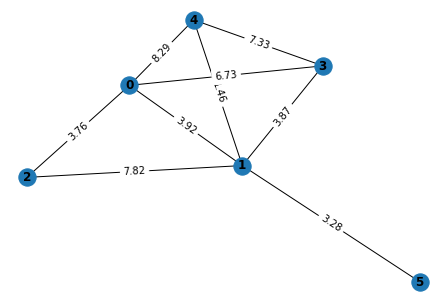

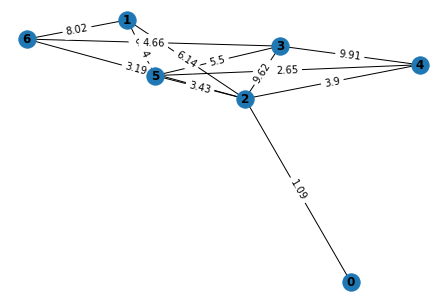

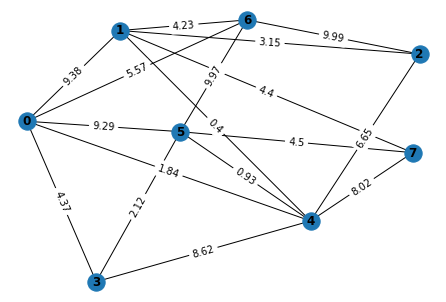

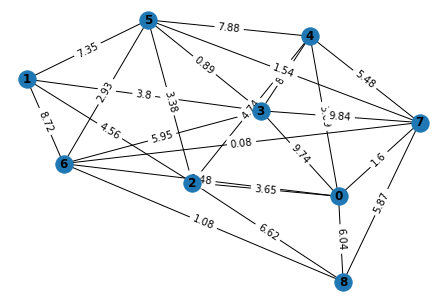

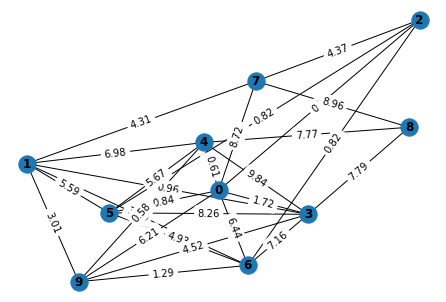

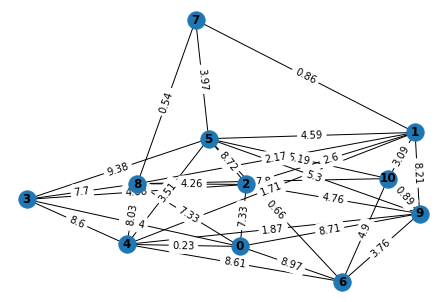

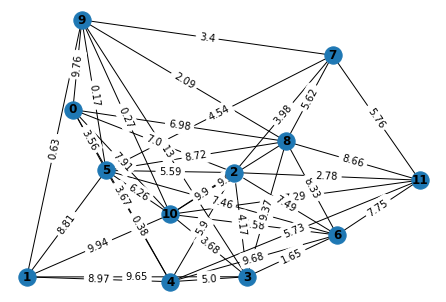

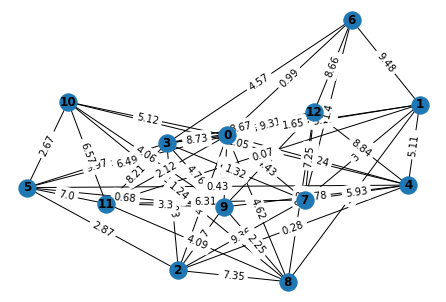

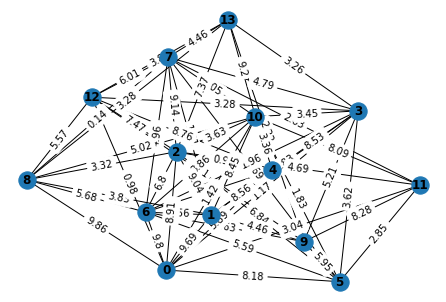

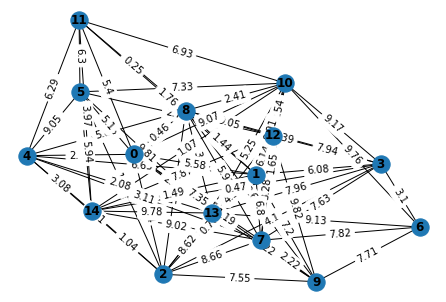

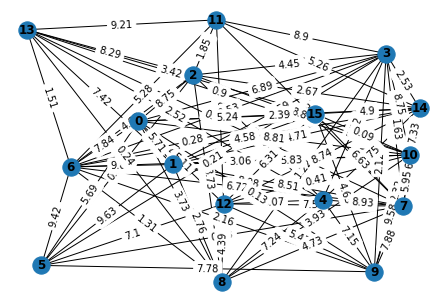

In [32]:
# Generate Graphs
graphs = []
positions = [] # Save the positions so that the graphs are drawn exactly the same way each time
for n in NODE_RANGE:
    G = generate_random_connected_graph(n, 10, math.floor(n*(n-1)/2))
    graphs.append(G)
    positions.append(nx.spring_layout(G))
    
for graph, pos in zip(graphs, positions):
    plt.figure()
    graph.draw_original(pos)
    

In [33]:
for graph in graphs:
    print(len(list(graph.nodes)),len(list(graph.edges)))

6 9
7 12
8 17
9 24
10 27
11 33
12 42
13 50
14 61
15 71
16 83


## Classical Solution
Find the maximum cut for each graph classically by trying each possible configuration. The time complexity should be $O(2^n)$

In [34]:
# Solve Max Cut Classically
solutions = []
for graph in graphs:
    solutions.append(graph.solve_maxcut_classical())

Solution: 001111, Cut Value: -35.21
Solution: 0010111, Cut Value: -51.68000000000001
Solution: 01001110, Cut Value: -73.53
Solution: 010110001, Cut Value: -87.85000000000002
Solution: 0000111101, Cut Value: -98.52000000000002
Solution: 00010110110, Cut Value: -123.85000000000004
Solution: 001011001110, Cut Value: -176.11999999999995
Solution: 0101010110101, Cut Value: -170.96000000000004
Solution: 01010110000111, Cut Value: -230.50999999999993
Solution: 000010010111110, Cut Value: -268.98999999999995
Solution: 0111001011001001, Cut Value: -277.44


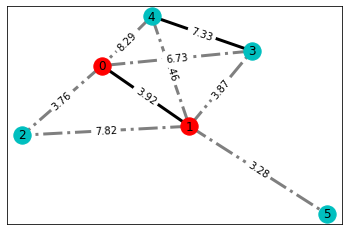

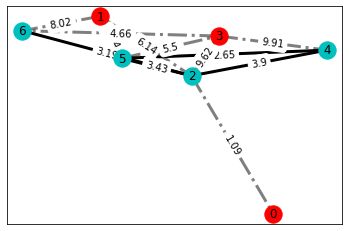

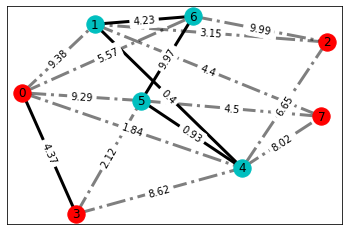

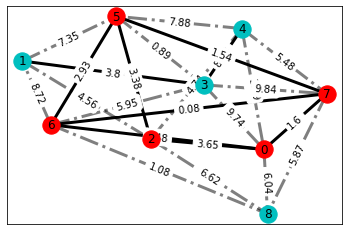

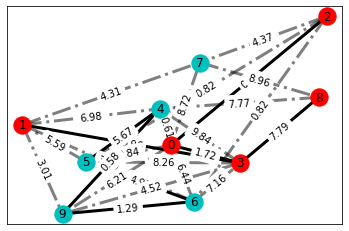

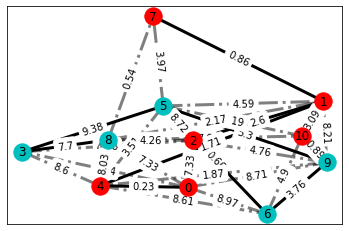

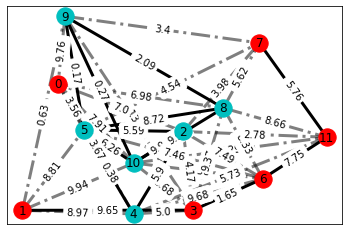

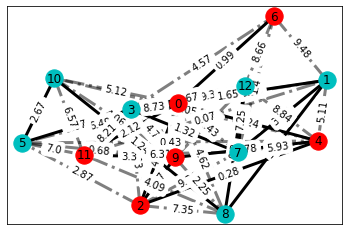

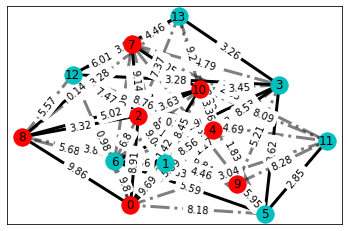

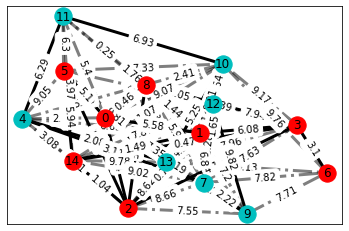

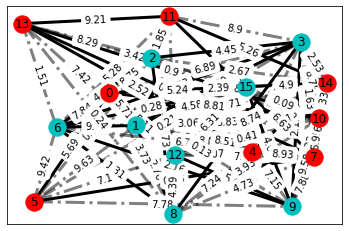

In [35]:
# Display solutions
for graph, pos, solution in zip(graphs, positions, solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [36]:
# Solve again, but this time keeping track of runtimes.
classical_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_classical()
    classical_times.append(t)

1.09 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.51 ms ± 85.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.44 ms ± 95.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.5 ms ± 4.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
52.5 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
114 ms ± 7.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
243 ms ± 8.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
703 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.74 s ± 235 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.06 s ± 843 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.8 s ± 4.54 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
# Print average solve time for each number of nodes
for t in classical_times:
    print(str(t.average) + " seconds")

0.0010852477252856912 seconds
0.002505071805714384 seconds
0.006441224677142665 seconds
0.01954842453857184 seconds
0.052467529085713845 seconds
0.114101381985714 seconds
0.24322569657140644 seconds
0.7032428808571629 seconds
1.743718196714326 seconds
4.062474035285699 seconds
11.757291251285713 seconds


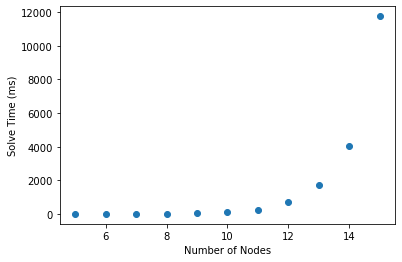

In [59]:
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms")

## D-Wave Solution
Find the maximum cut with D-Wave's Quantum Computer.

In [61]:
# Solve Max Cut 
dwave_solutions = []
dwave_solve_times = []
for graph in graphs:
    sol, runtime = graph.solve_maxcut_dwave(return_runtime = True)
    dwave_solutions.append(sol)
    dwave_solve_times.append(runtime)

Solution: 001111, Cut Value: -35.21
Solution: 1101000, Cut Value: -51.68000000000001
Solution: 10110001, Cut Value: -73.53
Solution: 101001110, Cut Value: -87.85000000000002
Solution: 0000111101, Cut Value: -98.52000000000002
Solution: 00010110110, Cut Value: -123.85000000000004
Solution: 001011001110, Cut Value: -176.11999999999995
Solution: 1010101001010, Cut Value: -170.96000000000004
Solution: 10101001111000, Cut Value: -230.50999999999993
Solution: 111101101000001, Cut Value: -268.98999999999995
Solution: 0111001011001001, Cut Value: -277.44


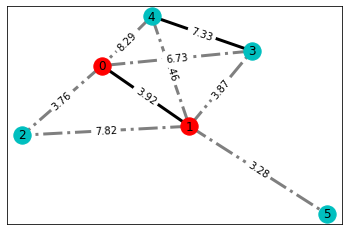

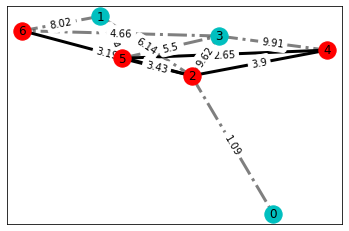

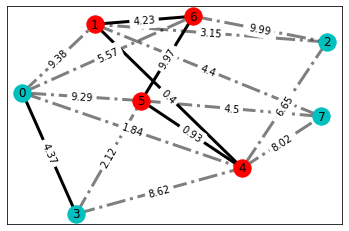

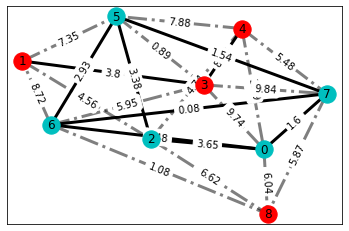

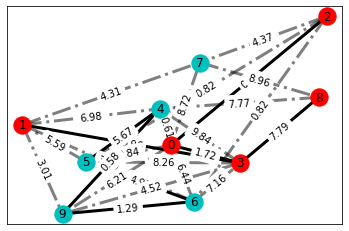

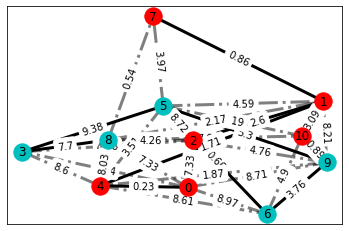

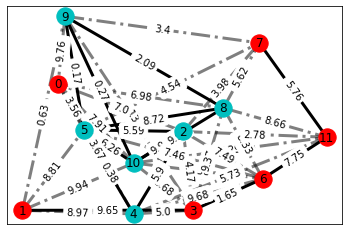

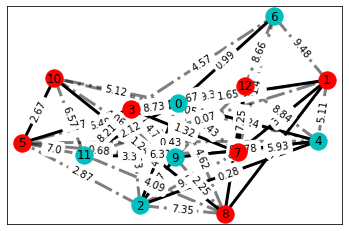

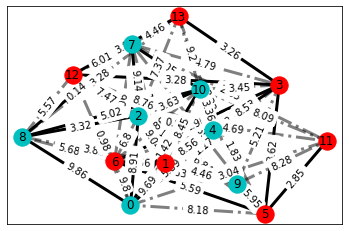

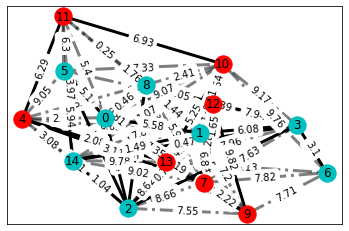

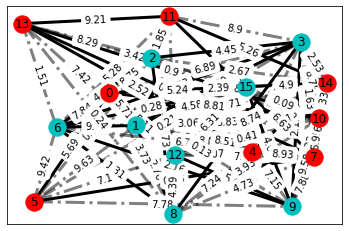

In [62]:
# Display Results
for graph, pos, solution in zip(graphs, positions, dwave_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [63]:
# Display Runtimes
for runtime in dwave_solve_times:
    print(runtime)

26750 microseconds
26878 microseconds
26804 microseconds
26943 microseconds
26982 microseconds
26803 microseconds
27055 microseconds
26843 microseconds
26922 microseconds
26859 microseconds
26929 microseconds


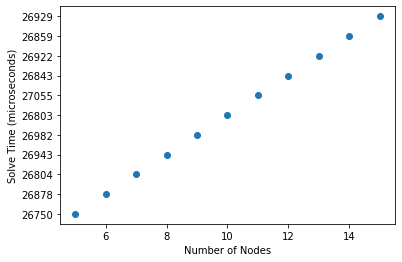

In [64]:
# Clean up runtime data from dwave maxcut method
dwave_solve_times = [t.replace(" microseconds","") for t in dwave_solve_times]
#dwave_solve_times = [int(t)/1000 for t in dwave_solve_times] # Convert microseconds to ms

# Plot runtimes
plot_time_growth(NODE_RANGE, dwave_solve_times, "microseconds")

## Qiskit Solution

In [51]:
P = 2 # Choose number of iterations to apply cost unitary

# Solve Max Cut with Qiskit
qiskit_solutions = []
for graph in graphs:
    qiskit_solutions.append(graph.solve_maxcut_qiskit(P))

Solution: 010010, Cut Value: -34.51
Solution: 1010000, Cut Value: -26.279999999999998
Solution: 11010001, Cut Value: -47.739999999999995
Solution: 000101110, Cut Value: -64.46000000000001
Solution: 1011110010, Cut Value: -66.24
Solution: 10101101100, Cut Value: -101.7
Solution: 010110111110, Cut Value: -131.29
Solution: 1111110000100, Cut Value: -126.41999999999999
Solution: 00110100000111, Cut Value: -157.49999999999997
Solution: 111100100001100, Cut Value: -221.28999999999994
Solution: 1001011001000010, Cut Value: -200.52000000000004


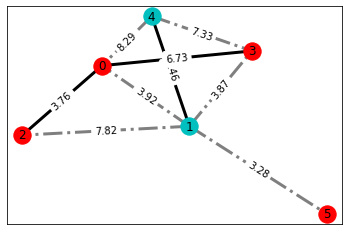

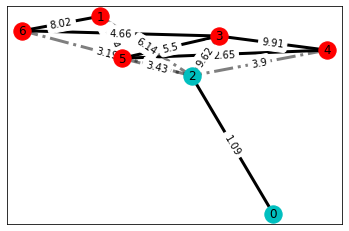

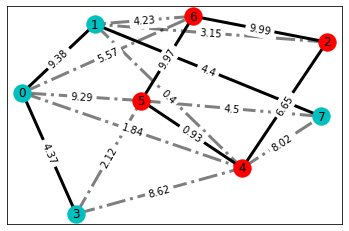

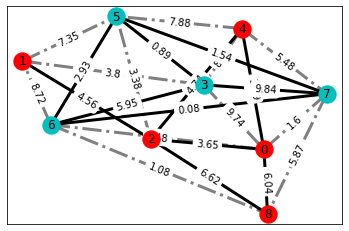

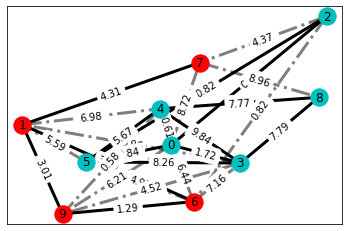

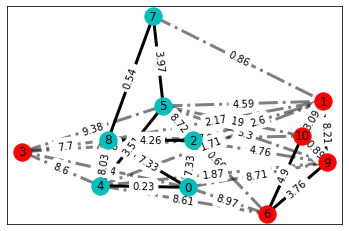

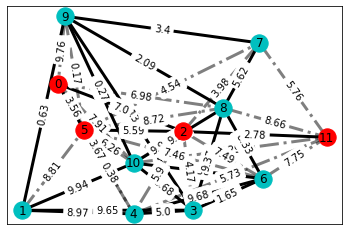

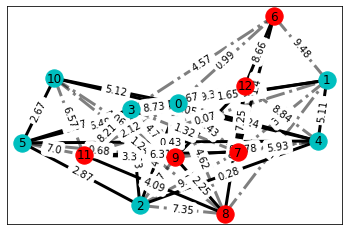

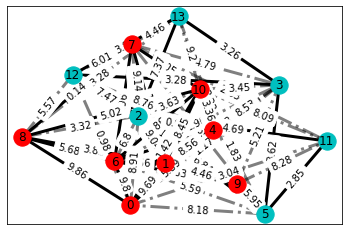

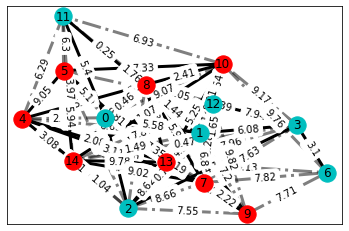

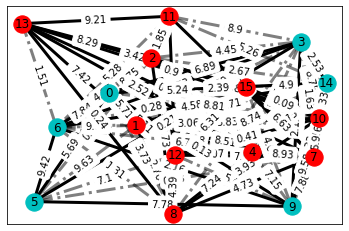

In [52]:
# Display Results
for graph, pos, solution in zip(graphs, positions, qiskit_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [54]:
# Check Runtimes
qiskit_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_qiskit(P)
    qiskit_times.append(t)

1.28 s ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.68 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.2 s ± 530 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.39 s ± 889 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.75 s ± 369 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.04 s ± 409 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.63 s ± 720 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.08 s ± 821 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.2 s ± 978 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.5 s ± 1.49 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.2 s ± 1.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
# Print average runtimes
for t in qiskit_times:
    print(str(t.average) + " seconds")

1.2763830250000865 seconds
1.6827109248570846 seconds
2.198229987571332 seconds
3.3917825814286124 seconds
3.7494275057143307 seconds
5.035386174714339 seconds
7.626840986571486 seconds
8.079697876999944 seconds
10.201460311714332 seconds
16.478721234428576 seconds
19.21440945814285 seconds


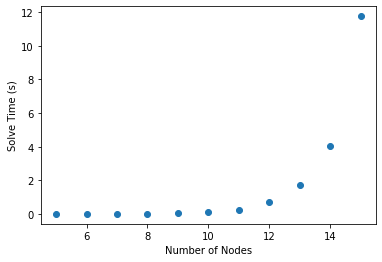

In [58]:
plot_time_growth(NODE_RANGE, [t.average for t in classical_times], "s")